In [15]:
import numpy as np
import pandas as pd
from statistics import mean, median
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import json
from collections import defaultdict
from collections import Counter
import random
from nltk.stem.porter import PorterStemmer


# Loading data

In [16]:
def read_file(file):
    labeled_data = []
    with open(file, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        i = 0 #counter
        for row in csv_reader:
            if i > 20000:
                break
            row = row[0]
            row = json.loads(row)
            labeled_data.append([row['category'], row['headline']])
            i += 1
            
    return labeled_data

            
            
            
data = read_file('News_Category_Dataset_v2.json')
print(len(data))


20001


In [17]:
def train_test_split(input_data, test_size=0.3):

    test_len = int(len(input_data) * 0.3)
    
    for i in range(len(input_data)):
        if i <= test_len:
            with open('News_test_data', 'a') as test_file:
                featureset = input_data[i][0] + ':::' + input_data[i][1] +'\n'
                test_file.write(featureset)
        else:
            with open('News_train_data', 'a') as train_file:
                featureset = input_data[i][0] + ':::' + input_data[i][1] + '\n'
                train_file.write(featureset)

    print(len(input_data))
    print(test_len)
    
train_test_split(data)
    
    
    
    

20001
6000


In [18]:
train_data = []
with open('News_train_data', 'r') as f:
    csv_file = csv.reader(f, delimiter='\n')
    for row in csv_file:
        train_data.append(row)
        
for i in range(len(train_data)):
    train_data[i][0] = train_data[i][0].split(':::')

new_train_data = []
for i in range(len(train_data)):
    for j in train_data[i]:
        new_train_data.append(j)
    
print(new_train_data)




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
def drop_rows(data):
    new_data = []
    for index in range(len(data)):
        featureset = data[index]
        try:
            msg = (data[index])[1]
            new_data.append(data[index])
        except:
         `   continue
    return new_data
            

In [31]:
new_train_data = drop_rows(new_train_data)

# Data visualisation

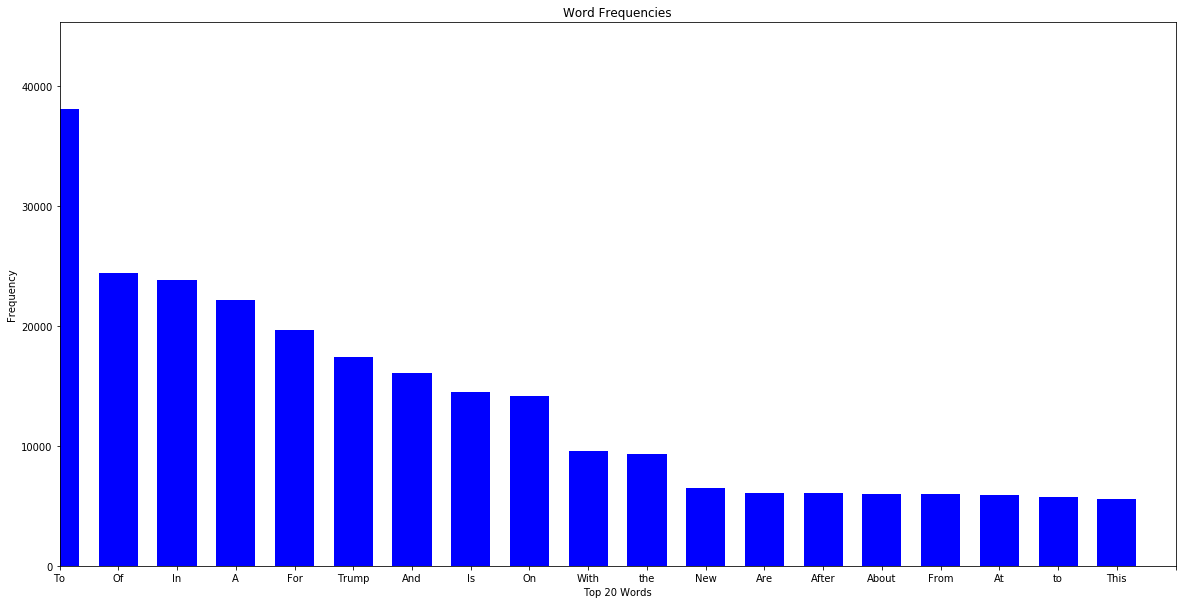

In [33]:
def sort(word):
    word, count = tuple(word)
    return count

# See the most common words inside the train data
def most_common_words(data, num_words=20):
    word_counts = defaultdict(int)
    chars = "\\`*_{}[]()>#+-.!$"
    for i in range(len(data)):
        featureset = data[i]
        words_feature = featureset[1]
        for char in chars:
            words_feature.replace(char, "")

        words_feature = words_feature.split()
        for word in words_feature:
            word_counts[word] += 1

    
    word_list = []
    for word, count in word_counts.items():
        word_list.append([word, count])
    
    
    word_list = sorted(word_list, key=sort, reverse=True)
    counts = [count for word, count in word_list[:num_words]]
    words = [word for word, count in word_list[:num_words]]
    
    fix, ax = plt.subplots(figsize=(20, 10))

    y = counts
    N = len(y)
    x = range(N)
    width = 1/1.5
    ax.bar(x, y, width=width, color='b')
    
    #lcoates ticks at a multiple of the number you provide
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    
    for i in range(20):
        labels[i] = words[i]

    ax.set_xlim(1, 20)
    ax.set_xticklabels(labels)
    ax.set_title('Word Frequencies')
    ax.set_xlabel('Top ' + str(num_words) + ' Words')
    ax.set_ylabel('Frequency')
    plt.show()
    
    
        
        
        
    
    
most_common_words(new_train_data)
        
        
        
        
    

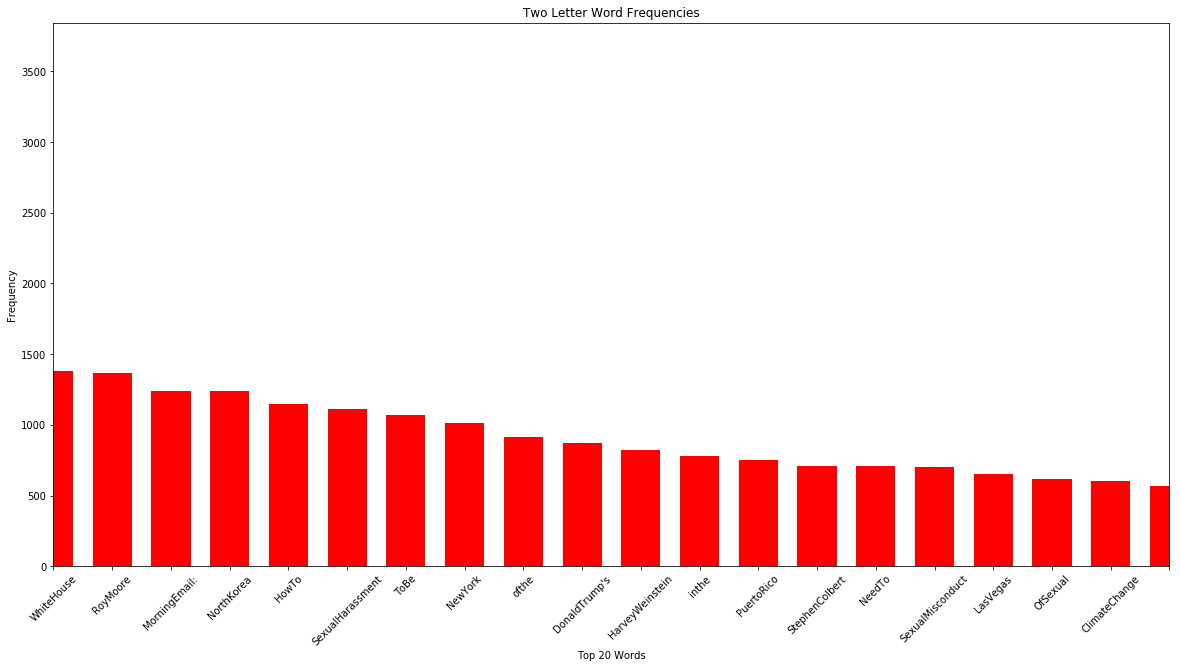

In [34]:
def sort(word):
    word, count = tuple(word)
    return count

def two_letter_words(data, num_words=20):
    word_counts = defaultdict(int)
    chars = "\\`*_{}[]()>#+-.!$"
    for i in range(len(data)):
        featureset = data[i]
        words_feature = featureset[1]
        for char in chars:
            words_feature.replace(char, "")

        new_words_feature = []
        old_words_feature = words_feature.split()
        length_of_sentence = len(words_feature.split())
        for i in range(length_of_sentence - 1):
            new_words_feature.append(old_words_feature[i] + old_words_feature[i+1])



        for word in new_words_feature:
            word_counts[word] += 1


    word_list = []
    for word, count in word_counts.items():
        word_list.append([word, count])
    
    
    word_list = sorted(word_list, key=sort, reverse=True)
    
    counts = []
    words = []
    bad_phrases = ['In', 'The', 'For', 'On', 'Is', 'A']
    num = 0
    index = 0
    while num <= num_words:
        word, count = tuple(word_list[index])
        poss = [phrase for phrase in bad_phrases if phrase in word]
        if poss != []:
            index += 1
            continue
        counts.append(count)
        words.append(word)
        index += 1
        num += 1
        
    
    
#     counts = [count for word, count in word_list[:num_words]]
#     words = [word for word, count in word_list[:num_words]]
    
    fix, ax = plt.subplots(figsize=(20, 10))

    y = counts
    N = len(y)
    x = range(N)
    width = 1/1.5
    ax.bar(x, y, width=width, color='r')
    
    #lcoates ticks at a multiple of the number you provide
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    labels = [item.get_text() for item in ax.get_xticklabels()]
    
    for i in range(20):
        labels[i] = words[i]

    ax.set_xlim(1, 20)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_title('Two Letter Word Frequencies')
    ax.set_xlabel('Top ' + str(num_words) + ' Words')
    ax.set_ylabel('Frequency')
    
    
    plt.show()
    
two_letter_words(new_train_data)   

# Naive Bayes

In [35]:
label, message = new_train_data[3]
print(label)

WORLD NEWS


In [36]:
import math
import re

In [37]:
def sorting(category_score):
    cate, score = category_score
    return score

def word_probs(data):
    word_probs = {}
    words_count = defaultdict(int)
    count = 0
    for index in range(len(data)):
        msg = (data[index])[1]
        chars = "\\`*_{}[]()>#+-.!$"
        for char in chars:
            msg.replace(char, "")
        
        words = msg.split()
        count += len(words)
        for word in words:
            words_count[word] += 1
       
    for word in words_count:
        word_probs[word] = words_count[word] / count
    
    return word_probs
        



In [54]:
def unique_words(data):
    words_list = []
    for index in range(len(data)):
        msg = (data[index])[1]
        chars = "\\`*_{}[]()>#+-.!$"
        for char in chars:
            msg.replace(char, "")
        
        words = msg.split()
        for word in words:
            words_list.append(word)
            
    words_list = set(words_list)
    return len(words_list)

def stemming(data):
    ps = PorterStemmer()
    for index in range(len(data)):
        msg = (data[index])[1]
        new_msg = ps.stem(msg)
        (data[index])[1] = new_msg
    return data
        
        

In [68]:
import math

class Naive_Bayes(object):
    
    def __init__(self, k=1):
        self.k = k 
        self.word_probs = {}
        self.unique_words = 0
        
    def classify(self, input_data):
        
        chars = "\\`*_{}[]()>#+-.!$"
        for char in chars:
            input_data.replace(char, "")
        ps = PorterStemmer()
        input_data = ps.stem(input_data)
  
            
        words = input_data.split()
        category_scores = {}
        for category in self.category_lengths:
            overall_prob = 1
            prob_msg_cate = 1
            prob_msg = 1
            for word in words:
                if word not in self.likelihood_table or word in 'IsisNotnotAaDoesdoesForforWhywhy':
                    continue
                else:
                    prob_msg_cate *= self.likelihood_table[word][category]
                    prob_msg *= self.word_probs[word]
            
            prob_cate = self.category_lengths[category]/len(self.frequency_table)
        
            score = prob_msg_cate * prob_cate / prob_msg
            category_scores[category] = score
        
        word_list = []
        for category, score in category_scores.items():
                word_list.append([category, score])
                
        word_list = sorted(word_list, key=sorting, reverse=True)

        
        return (word_list[0])[0]
                
                
    
    def train(self, data):
        
        # FIND OUT ALL OF THE CATEGORIES IN THE INPUT DATA
        labels = []
        for i in range(len(data)):
            label, message = data[i]
            labels.append(label)
        labels = list(set(labels))
        
        #Stemming the data
        data = stemming(data)
        
        # Finding the probability for each word in the input data
        self.word_probs = word_probs(data)
        
        #Finding number of unique words in data
        self.unique_words = unique_words(data)
        
        
        # Constructing a frequency table
        self.frequency_table = {}
        
        for index in range(len(data)):
            label = (data[index])[0]
            message = (data[index])[1]
            words = message.split()
            for word in words:
                if word not in self.frequency_table:
                    self.frequency_table[word] = {}
                    self.frequency_table[word][label] = 1
                else:
                    if label not in self.frequency_table[word]:
                        self.frequency_table[word][label] = 1
                    else:
                        self.frequency_table[word][label] += 1
    
        self.old_frequency_table = self.frequency_table
        
        # Find out the number of instances that contain each category
                           
        self.category_lengths = defaultdict(int)
        for j in range(len(data)):
            self.category_lengths[(data[j])[0]] += 1
        

        #Building our likelihood table
        for word in self.frequency_table:
            for category in self.category_lengths:
                #Doing Laplace smoothing 
                #If a word does not appear in a category, the word gets a 1
                if category not in self.frequency_table[word]:
                    self.frequency_table[word][category] = 1
                #Else the word gets an extra 1
                else:
                    self.frequency_table[word][category] += 1
                    
                # To build each cell in the likelihood dict, we need the number of times a word appears in that category,
                # divided by the number of words in each category plus the number of unique words in the entire input data
                number = self.frequency_table[word][category]
                ratio = number / (self.category_lengths[category] + self.unique_words)
                self.frequency_table[word][category] = ratio

        
        self.likelihood_table = self.frequency_table
        self.frequency_table = self.old_frequency_table

        
                
                
                

naive_bayes = Naive_Bayes()
naive_bayes.train(new_train_data)
    
result = naive_bayes.classify('jim carrey')
print(result)

POLITICS


# Accuracy

In [66]:
#Loading the test data
test_data = []
with open('News_test_data', 'r') as f:
    csv_file = csv.reader(f, delimiter='\n')
    for row in csv_file:
        test_data.append(row)


for i in range(len(test_data)):
    test_data[i][0] = test_data[i][0].split(':::')

new_test_data = []
ps = PorterStemmer()
for i in range(len(test_data)):
    for j in test_data[i]:
        new_test_data.append(j)
        
new_test_data = drop_rows(new_test_data)
new_test_data = stemming(new_test_data)
print(new_test_data[:10])


[['CRIME', 'there were 2 mass shootings in texas last week, but only 1 on tv'], ['ENTERTAINMENT', "will smith joins diplo and nicky jam for the 2018 world cup's official song"], ['ENTERTAINMENT', 'hugh grant marries for the first time at age 57'], ['ENTERTAINMENT', "jim carrey blasts 'castrato' adam schiff and democrats in new artwork"], ['ENTERTAINMENT', 'julianna margulies uses donald trump poop bags to pick up after her dog'], ['ENTERTAINMENT', "morgan freeman 'devastated' that sexual harassment claims could undermine legaci"], ['ENTERTAINMENT', "donald trump is lovin' new mcdonald's jingle in 'tonight show' bit"], ['ENTERTAINMENT', 'what to watch on amazon prime that’s new this week'], ['ENTERTAINMENT', "mike myers reveals he'd 'like to' do a fourth austin powers film"], ['ENTERTAINMENT', 'what to watch on hulu that’s new this week']]


In [67]:
actual_labels = []
for label, msg in new_test_data:
    actual_labels.append(label)
# actual_labels = [[label for label, msg in new_test_data]]

y_pred = []
for index in range(len(new_test_data)):
    msg = (new_test_data[index])[1]
    label = naive_bayes.classify(msg)
    y_pred.append(label)

correct = 0
num_labels = len(actual_labels)
for i in range(len(actual_labels)):
    if actual_labels[i] == y_pred[i]:
        correct += 1

print(y_pred[:10])
print(correct/num_labels*100)






['POLITICS', 'ENTERTAINMENT', 'ENTERTAINMENT', 'POLITICS', 'POLITICS', 'POLITICS', 'ENTERTAINMENT', 'POLITICS', 'ENTERTAINMENT', 'POLITICS']
53.212343397312566


In [45]:

categories = []
for i in naive_bayes.category_lengths:
    categories.append(i)
print(categories)

y_pred = []
for index in range(len(new_test_data)):
    y_pred.append(random.choice(categories))
    
correct = 0
num_labels = len(actual_labels)
for i in range(len(actual_labels)):
    if actual_labels[i] == y_pred[i]:
        correct += 1
print(correct)
print(num_labels)
print(correct/num_labels)

['POLITICS', 'WORLD NEWS', 'ENTERTAINMENT', 'SPORTS', 'QUEER VOICES', 'COMEDY', 'BLACK VOICES', 'WOMEN', 'MEDIA', 'WEIRD NEWS', 'SCIENCE', 'BUSINESS', 'RELIGION', 'EDUCATION', 'COLLEGE', 'LATINO VOICES', 'TRAVEL', 'IMPACT', 'PARENTS', 'CRIME', 'TECH', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS']
2350
66011
0.03560012725151868
